<a href="https://colab.research.google.com/github/danamixx/CEL-Project/blob/main/model_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Part 1 : Descriptive Analysis

In [3]:
import pandas as pd
import numpy as np

nb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Main Colab Files/CEL/Wash_U_NewBalance_Project_V5.txt",encoding="utf16",error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 312025: expected 33 fields, saw 34\n'
b'Skipping line 641698: expected 33 fields, saw 34\n'
b'Skipping line 790728: expected 33 fields, saw 34\n'
b'Skipping line 1404004: expected 33 fields, saw 34\n'
b'Skipping line 1437907: expected 33 fields, saw 34\n'
b'Skipping line 1612788: expected 33 fields, saw 34\n'
b'Skipping line 1835371: expected 33 fields, saw 34\n'
b'Skipping line 1981467: expected 33 fields, saw 34\nSkipping line 1982292: expected 33 fields, saw 34\n'
b'Skipping line 1998274: expected 33 fields, saw 34\n'
b'Skipping line 2841560: expected 33 fields, saw 34\n'
b'Skipping line 2931257: expected 33 fields, saw 34\n'
b'Skipping line 3855040: expected 33 fields, saw 34\n'
b'Skipping line 4828003: expected 33 fields, saw 34\n'


In [4]:
nb.head()

,ordernumber,transactionsequence,orderitem_id,Order_Placed_Date,consumer_key,New Customer Order Flag,NBUS_NewReturning,NewReturning,Billing Postal Code,Shipping Postal Code,...,SKU,style,width_color,transactiontype,shipmethod,Return/Exchange,Return_Process_Date,Return/Exchange Order Subtotal,Return/Exchange Transaction Total,Return/Exchange Transaction Subtotal
0,NS6930564,2,51029577,20180510.0,8055027.0,New Customer,NEW,NEW,90605-1643,90605-1643,...,798248416683,KTNTRPNY,W,sales,UPSSPPS,NaN,NaN,NaN,NaN,NaN
1,NSE707387,2,67558774,20210311.0,18871404.0,New Customer,NEW,NEW,54701,54701,...,194389002622,WCRZRRB,B,sales,Ground,NaN,NaN,NaN,NaN,NaN
2,NSE646379,2,67388151,20210303.0,18790660.0,New Customer,NEW,NEW,97801,97801,...,195173233000,WL574WK2,B,sales,Ground,NaN,NaN,NaN,NaN,NaN
3,NSE702138,2,67541045,20210310.0,18804019.0,New Customer,NEW,NEW,76302,76302,...,195173231297,WL574VA2,B,sales,Ground,NaN,NaN,NaN,NaN,NaN
4,NSE857893,2,67929334,20210329.0,19048315.0,New Customer,NEW,NEW,92270,92270,...,194389943086,M860A11,D,sales,Ground,NaN,NaN,NaN,NaN,NaN


In [ ]:
# nb = nb[nb['NBUS_NewReturning'].isin(['NEW', 'RETURNING'])]
# nb = nb[nb['NewReturning'].isin(['NEW', 'RETURNING'])]
# nb = nb[nb['New Customer Order Flag'].isin(['New Customer', 'Returning Customer'])]

In [ ]:
nb_clean = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Main Colab Files/CEL/NB_Cleaned.txt")

In [ ]:
nb_clean.head()

In [ ]:
print(nb.shape)

In [ ]:
nb_bad = nb.query("transactionsequence == ['Visa','MasterCard','AmEx']")

In [ ]:
nb_bad

In [ ]:
print(nb_bad.shape)

In [ ]:
# nb_fit.query("discountcode	== [0,6.75,'Comfort','FW-W-Cntry','Speed Ride','Studio']")

In [ ]:
nb_fit = nb.query("transactionsequence != ['Visa','MasterCard','AmEx']")
print(nb_fit.shape)

In [ ]:
nb_fit.head()

In [ ]:
nb_fw = nb_fit.query("Class == 'FOOTWEAR'")
print(nb_fw.shape)

In [ ]:
nb_fit['retailprice'] = nb_fit['retailprice'].astype(float)

In [ ]:
nb_fit['Order_Placed_Date'] = nb_fit['Order_Placed_Date'].astype(int)
nb_fit['Order_Placed_Date'] = nb_fit['Order_Placed_Date'].astype(str)
nb_fit['Order_Placed_Date'] = pd.to_datetime(nb_fit['Order_Placed_Date'])

In [ ]:
nb_fit.head()

In [ ]:
nb_fit['Return_Process_Date'] = nb_fit['Return_Process_Date'].fillna("19700101").astype(int)

In [ ]:
nb_fit['Return_Process_Date'] = nb_fit['Return_Process_Date'].astype(str)
nb_fit['Return_Process_Date'] = pd.to_datetime(nb_fit['Return_Process_Date'])

In [ ]:
nb_fit.head()

In [ ]:
nb_fit.to_csv('/content/drive/MyDrive/Colab Notebooks/Main Colab Files/CEL/NB_Cleaned.txt')

In [ ]:
nb_fw.to_csv('/content/drive/MyDrive/Colab Notebooks/Main Colab Files/CEL/NB_FOOTWEAR.txt')

In [ ]:
couponamount = nb_fit['couponamount']
discountamount = nb_fit['discountamount']
transactionsequence = nb_fit['transactionsequence']
retailprice = nb_fit['retailprice']
ordersubtotal = nb_fit['ordersubtotal']
transactiontotal = nb_fit['transactiontotal']
transactionsubtotal = nb_fit['transactionsubtotal']
Return_Exchange_Order_Subtotal = nb_fit['Return/Exchange Order Subtotal']
Return_Exchange_Transaction_Total = nb_fit['Return/Exchange Transaction Total']
Return_Exchange_Transaction_Subtotal = nb_fit['Return/Exchange Transaction Subtotal']

In [ ]:
object_result = nb_fit.describe(include=['object'])
object_result

In [ ]:
import matplotlib.pyplot as plt   
import matplotlib
fig = plt.figure(figsize=(16,12), dpi=1080)

plt.subplot(231)
plt.hist(x = Return_Exchange_Order_Subtotal, 
         range = (-230,2),
         bins = 20, 
         color = 'steelblue', 
         edgecolor = 'black' 
          )
plt.ylabel("Frequency")
plt.xlabel("Return_Exchange_Order_Subtotal")


plt.subplot(232)
plt.hist(x = Return_Exchange_Transaction_Total, 
         range = (-230,2),
         bins = 20, 
         color = 'steelblue', 
         edgecolor = 'black' 
          )
plt.ylabel("Frequency")
plt.xlabel("Return_Exchange_Transaction_Total")


plt.subplot(233)
plt.hist(x = Return_Exchange_Transaction_Subtotal, 
         range = (-230,2),
         bins = 20, 
         color = 'steelblue', 
         edgecolor = 'black' 
          )
plt.ylabel("Frequency")
plt.xlabel("Return_Exchange_Transaction_Subtotal")


plt.subplot(234)
plt.hist(x = df["transactiontotal"].astype(float), 
         range = (-50,250),
         bins = 20, 
         color = 'steelblue', 
         edgecolor = 'black' 
          )
plt.ylabel("Frequency")
plt.xlabel("Transaction Total")


plt.subplot(235)
plt.hist(x = df["transactionsubtotal"].astype(float), 
         range = (-50,250),
         bins = 20, 
         color = 'steelblue', 
         edgecolor = 'black' 
          )
plt.ylabel("Frequency")
plt.xlabel("Transaction Subtotal")


plt.subplot(236)
plt.hist(x = df["ordersubtotal"].astype(float), 
         range = (-50,250),
         bins = 20, 
         color = 'steelblue',
         edgecolor = 'black' 
          )
plt.ylabel("Frequency")
plt.xlabel("Order Subtotal")


plt.suptitle('Frequency Distribution of Numerical Variables')
plt.show()

In [ ]:
couponamount = nb_num['couponamount']
discountamount = nb_num['discountamount']
# nb_1 = nb_fit[nb_fit[:,(13,15)]!=0,:]
# nb_fit[nb_fit.couponamount.isin([4.9])]

In [ ]:
#couponamount = couponamount[couponamount>0]
nb_num['couponamount'] = nb_num['couponamount'].astype(float)

In [ ]:
couponamnt_wo_zero = nb_num[nb_num['couponamount']!=0.0].couponamount

In [ ]:
couponamnt_wo_zero = nb_num[nb_num['couponamount']!=0].couponamount
discountamnt_wo_zero = nb_num[nb_num['discountamount']!=0].discountamount

In [ ]:
couponamnt_wo_zero.value_counts()

In [ ]:
def status(x) : 
    return pd.Series([x.nunique(),x.sum(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mode(),x.mad(),x.var(),
                      x.std()],index=['Count','Sum','Min','Min_id','25%Quantile',
                    'Medium','75%Quantile','Mean','Max','Max_id','Mode','MAD','Var','Std'])



In [ ]:
nb_num = pd.DataFrame(np.array([couponamount,discountamount,retailprice,ordersubtotal,transactiontotal,transactionsubtotal,Return_Exchange_Order_Subtotal,Return_Exchange_Transaction_Total,Return_Exchange_Transaction_Subtotal]).T, columns=['couponamount','discountamount','retailprice','ordersubtotal','transactiontotal','transactionsubtotal','Return_Exchange_Order_Subtotal','Return_Exchange_Transaction_Total','Return_Exchange_Transaction_Subtotal'])

nb_num.head()

In [ ]:
nb_num.apply(pd.to_numeric,errors="coerce").fillna(0)

In [ ]:
nb['consumer_key'].nunique()

In [ ]:
df1 = nb[nb['New Customer Order Flag'].isin(['New Customer'])]
df1.head()

In [ ]:
df1['consumer_key'].nunique()

In [ ]:
df1['consumer_key'].value_counts()

In [ ]:
nb['Return/Exchange'].value_counts()

In [ ]:
traindata=pd.DataFrame(df,dtype=np.float)

In [ ]:
traindata.apply(status)

In [ ]:
traindata.mode()

## Part 2 : Predictive Analysis

### Question 1: Return or Not (Classfication Model)

#### Create input and output variables

In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Main Colab Files/CEL/NB_Cleaned.txt")
df = df.query("Class == 'FOOTWEAR'")

In [4]:
df.head()

,Unnamed: 0,ordernumber,transactionsequence,orderitem_id,Order_Placed_Date,consumer_key,New Customer Order Flag,NBUS_NewReturning,NewReturning,Billing Postal Code,Shipping Postal Code,paymenttype,couponcode,couponamount,discountcode,discountamount,retailprice,ordersubtotal,transactiontotal,transactionsubtotal,Class,Category,Gender,Subcategory,SKU,style,width_color,transactiontype,shipmethod,Return/Exchange,Return_Process_Date,Return/Exchange Order Subtotal,Return/Exchange Transaction Total,Return/Exchange Transaction Subtotal
0,0,NS6930564,2,51029577.0,2018-05-10,8055027.0,New Customer,NEW,NEW,90605-1643,90605-1643,Visa,HILTON15,7.86,NaN,0.0,54.99,47.13,51.61,54.99,FOOTWEAR,Kids,GRADESCHOO,Trail/Outdoor,798248416683,KTNTRPNY,W,sales,UPSSPPS,NaN,1970-01-01,NaN,NaN,NaN
1,1,NSE707387,2,67558774.0,2021-03-11,18871404.0,New Customer,NEW,NEW,54701,54701,Visa,NaN,0.00,NaN,0.0,79.99,79.99,84.39,79.99,FOOTWEAR,Running,WOMEN,Neutral Cushioning,194389002622,WCRZRRB,B,sales,Ground,NaN,1970-01-01,NaN,NaN,NaN
2,2,NSE646379,2,67388151.0,2021-03-03,18790660.0,New Customer,NEW,NEW,97801,97801,Afterpay,NaN,0.00,NaN,0.0,79.99,79.99,79.99,79.99,FOOTWEAR,Classics,WOMEN,Heritage,195173233000,WL574WK2,B,sales,Ground,NaN,1970-01-01,NaN,NaN,NaN
3,3,NSE702138,2,67541045.0,2021-03-10,18804019.0,New Customer,NEW,NEW,76302,76302,MasterCard,NaN,0.00,NaN,0.0,79.99,79.99,86.59,79.99,FOOTWEAR,Classics,WOMEN,Heritage,195173231297,WL574VA2,B,sales,Ground,NaN,1970-01-01,NaN,NaN,NaN
4,4,NSE857893,2,67929334.0,2021-03-29,19048315.0,New Customer,NEW,NEW,92270,92270,Visa,NaN,0.00,NaN,0.0,129.99,129.99,140.06,129.99,FOOTWEAR,Running,MEN,Stability,194389943086,M860A11,D,sales,Ground,NaN,1970-01-01,NaN,NaN,NaN


In [7]:
df.shape

(5789440, 34)

In [5]:
nb_1 = pd.DataFrame()

In [6]:
# Output: Return or Not
Return = df["Return/Exchange"].str.lower()
nb_1["Return"] = np.where(Return != "returns",0,1)

In [7]:
paymenttype = df["paymenttype"].str.lower()

# #check if payment type is visa
# nb_1['Visa'] = np.where(paymenttype == 'visa', 1, 0)

# #check if payment type is Paypal
# nb_1['Paypal'] = np.where(paymenttype == 'paypal', 1, 0)

# #check if payment type is MasterCard
# nb_1['MasterCard'] = np.where(paymenttype.str.contains('master'), 1, 0)

#check if payment type is AMEX
nb_1['AMEX'] = np.where(paymenttype == 'amex', 1, 0)

In [8]:
# # convert coupon amount ($) to % of retail price
# nb_1['Coupon_Amount'] = (df['couponamount'] / df['retailprice']) * 100

# convert discount amount + coupon amount ($) to % of retail price
nb_1['Discount'] = ((df['discountamount']+df['couponamount']) / df['transactionsubtotal']) * 100

In [9]:
# number of days from order placed date to current date
import datetime
now_str = datetime.datetime.now().strftime('%Y-%m-%d')
now = datetime.datetime.strptime(now_str, "%Y-%m-%d")
df['Order_Placed_Date'] = pd.to_datetime(df['Order_Placed_Date'], format = "%Y-%m-%d")
nb_1['Days_to_Date'] = (now - df['Order_Placed_Date']).apply(lambda x : x.days)

In [10]:
nb_1['Retail_Price'] = df['retailprice']

In [11]:
Size = df["width_color"]
nb_1['D_size'] = np.where(Size == 'D', 1, 0)
nb_1['B_size'] = np.where(Size == 'B', 1, 0)
nb_1['2E_size'] = np.where(Size == '2E', 1, 0)

In [12]:
Style = df["style"]

nb_1['574_Collection'] = np.where(Style.str.contains("574"), 1, 0)
nb_1['993_Collection'] = np.where(Style.str.contains("990"), 1, 0)
nb_1['990_Collection'] = np.where(Style.str.contains("993"), 1, 0)

In [13]:
no = {}
ordernumbers = df["ordernumber"]
for parent_order in ordernumbers:
  if parent_order in no:
    no[parent_order]+=1
  else:
    no[parent_order]=1

nb_1["Suborders"] = list(map(no.get, df['ordernumber']))

In [14]:
## zipcode
# Is billing code = shipping code?
nb_1['Diff_zipcodes'] = np.where(df['Billing Postal Code'] != df['Shipping Postal Code'], 1, 0)

# 1st digit of shipping code
nb_1['1st_digit_shipcodes'] = df.loc[df['Shipping Postal Code'].notna(), 'Shipping Postal Code'].apply(lambda x: str(x)[:2])


In [15]:
#check if male or female
nb_1['Women'] = np.where(df["Gender"]=="WOMEN", 1, 0)
nb_1['Men'] = np.where(df["Gender"]=="MEN", 1, 0)
nb_1['Unisex'] = np.where(df["Gender"]=="UNISEX", 1, 0)

#check if new customer    
nb_1['New_customer'] = np.where(df['New Customer Order Flag']=='New Customer', 1, 0)

#check if UPSSPPS
nb_1['UPSSPPS'] = np.where(df['shipmethod']=='UPSSPPS', 1, 0)

#check if shipping method was Ground
nb_1['Ground'] = np.where(df['shipmethod']=='Ground', 1, 0)

In [16]:
Category = df["Category"].str.lower()
Subcategory = df["Subcategory"]

# # check if Category = Running or FW Running or Trail Running and Subcategory = Neutral Cushioning
# nb_1["Running_Neutral"] = np.where((Category.str.contains("running")) & (Subcategory == 'Neutral Cushioning'),1,0)

# # check if Category = Running or FW Running or Trail Running and Subcategory ≠ Neutral Cushioning
# nb_1["Running_Not_Neutral"] = np.where((Category.str.contains("running")) & (Subcategory != 'Neutral Cushioning'),1,0)

# check if Category = Running or FW Running or Trail Running
nb_1["Running"] = np.where((Category.str.contains("running")),1,0)

# # check if Category = Classic or FW Classic and Subcategory = Heritage
# nb_1["Classics_Heritage"] = np.where((Category.str.contains("classic")) & (Subcategory == 'Heritage'),1,0)

# # check if Category = Classic or FW Classic and Subcategory ≠ Heritage

# check if Category = Classic or FW Classic and Subcategory = Heritage
nb_1["Classics"] = np.where((Category.str.contains("classic")),1,0)

nb_1["FW-R-Train"] = np.where((Subcategory.str.contains("FW-R-Train")),1,0)

# # check if Category = Kids
# nb_1["Kids"] = np.where((Category.str.contains("kid")), 1, 0)

# check if Category = Training or FW X-Train
nb_1["Training"] = np.where((Category.str.contains("train")),1,0)

# check if Category = Walking or FW Walking
nb_1["Walking"] = np.where((Category.str.contains("walking")),1,0)

# check if Category = Ball Games
nb_1["Football"] = np.where((Category.str.contains("football")),1,0)
nb_1["Tennis"] = np.where((Category.str.contains("tennis")),1,0)
nb_1["Baseball"] = np.where((Category.str.contains("baseball")),1,0)

In [18]:
nb_1.head()

,Return,AMEX,Discount,Days_to_Date,Retail_Price,D_size,B_size,2E_size,574_Collection,993_Collection,990_Collection,Suborders,Diff_zipcodes,1st_digit_shipcodes,Women,Men,Unisex,New_customer,UPSSPPS,Ground,Running,Classics,FW-R-Train,Training,Walking,Football,Tennis,Baseball
0,0,0,14.293508,1424.0,54.99,0,0,0,0,0,0,2,0,90,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0.000000,388.0,79.99,0,1,0,0,0,0,1,0,54,1,0,0,1,0,1,1,0,0,0,0,0,0,0
2,0,0,0.000000,396.0,79.99,0,1,0,1,0,0,1,0,97,1,0,0,1,0,1,0,1,0,0,0,0,0,0
3,0,0,0.000000,389.0,79.99,0,1,0,1,0,0,1,0,76,1,0,0,1,0,1,0,1,0,0,0,0,0,0
4,0,0,0.000000,370.0,129.99,1,0,0,0,0,0,2,0,92,0,1,0,1,0,1,1,0,0,0,0,0,0,0


In [21]:
nb_1.shape

(5789440, 31)

In [ ]:
nb_1.to_csv('/content/drive/MyDrive/Colab Notebooks/Main Colab Files/CEL/NB_model1.txt')

#### Xgboost Model

In [17]:
import pandas as pd
import numpy as np
import sklearn
from scipy import sparse
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import preprocessing, metrics
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from matplotlib import pyplot

# # Load data
# nb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Main Colab Files/CEL/NB_model1.txt", index_col=[0])
# nb.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
# pd.set_option("display.max_columns",100)
# nb.head()

In [18]:
nb = nb_1.copy()
nb.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [19]:
# Separating the Categorical data
categorical_columns = nb.select_dtypes(include=['object']).columns
categorical_columns

Index(['1st_digit_shipcodes'], dtype='object')

In [20]:
# Categorical data into numeric data
encoded_nb = pd.get_dummies(nb, drop_first=True)
encoded_nb = encoded_nb.iloc[:,:-16]
encoded_nb.head()

,Return,AMEX,Discount,Days_to_Date,Retail_Price,D_size,B_size,2E_size,574_Collection,993_Collection,990_Collection,Suborders,Diff_zipcodes,Women,Men,Unisex,New_customer,UPSSPPS,Ground,Running,Classics,FW-R-Train,Training,Walking,Football,Tennis,Baseball,1st_digit_shipcodes_01,1st_digit_shipcodes_02,1st_digit_shipcodes_03,1st_digit_shipcodes_04,1st_digit_shipcodes_05,1st_digit_shipcodes_06,1st_digit_shipcodes_07,1st_digit_shipcodes_08,1st_digit_shipcodes_09,1st_digit_shipcodes_10,1st_digit_shipcodes_11,1st_digit_shipcodes_12,1st_digit_shipcodes_13,1st_digit_shipcodes_14,1st_digit_shipcodes_15,1st_digit_shipcodes_16,1st_digit_shipcodes_17,1st_digit_shipcodes_18,1st_digit_shipcodes_19,1st_digit_shipcodes_20,1st_digit_shipcodes_21,1st_digit_shipcodes_22,1st_digit_shipcodes_23,1st_digit_shipcodes_24,1st_digit_shipcodes_25,1st_digit_shipcodes_26,1st_digit_shipcodes_27,1st_digit_shipcodes_28,1st_digit_shipcodes_29,1st_digit_shipcodes_30,1st_digit_shipcodes_31,1st_digit_shipcodes_32,1st_digit_shipcodes_33,1st_digit_shipcodes_34,1st_digit_shipcodes_35,1st_digit_shipcodes_36,1st_digit_shipcodes_37,1st_digit_shipcodes_38,1st_digit_shipcodes_39,1st_digit_shipcodes_4,1st_digit_shipcodes_40,1st_digit_shipcodes_41,1st_digit_shipcodes_42,1st_digit_shipcodes_43,1st_digit_shipcodes_44,1st_digit_shipcodes_45,1st_digit_shipcodes_46,1st_digit_shipcodes_47,1st_digit_shipcodes_48,1st_digit_shipcodes_49,1st_digit_shipcodes_50,1st_digit_shipcodes_51,1st_digit_shipcodes_52,1st_digit_shipcodes_53,1st_digit_shipcodes_54,1st_digit_shipcodes_55,1st_digit_shipcodes_56,1st_digit_shipcodes_57,1st_digit_shipcodes_58,1st_digit_shipcodes_59,1st_digit_shipcodes_60,1st_digit_shipcodes_61,1st_digit_shipcodes_62,1st_digit_shipcodes_63,1st_digit_shipcodes_64,1st_digit_shipcodes_65,1st_digit_shipcodes_66,1st_digit_shipcodes_67,1st_digit_shipcodes_68,1st_digit_shipcodes_69,1st_digit_shipcodes_70,1st_digit_shipcodes_71,1st_digit_shipcodes_72,1st_digit_shipcodes_73,1st_digit_shipcodes_74,1st_digit_shipcodes_75,1st_digit_shipcodes_76,1st_digit_shipcodes_77,1st_digit_shipcodes_78,1st_digit_shipcodes_79,1st_digit_shipcodes_80,1st_digit_shipcodes_81,1st_digit_shipcodes_82,1st_digit_shipcodes_83,1st_digit_shipcodes_84,1st_digit_shipcodes_85,1st_digit_shipcodes_86,1st_digit_shipcodes_87,1st_digit_shipcodes_88,1st_digit_shipcodes_89,1st_digit_shipcodes_90,1st_digit_shipcodes_91,1st_digit_shipcodes_92,1st_digit_shipcodes_93,1st_digit_shipcodes_94,1st_digit_shipcodes_95,1st_digit_shipcodes_96,1st_digit_shipcodes_97,1st_digit_shipcodes_98,1st_digit_shipcodes_99
0,0,0,14.293508,1424.0,54.99,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0.000000,388.0,79.99,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0.000000,396.0,79.99,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0.000000,389.0,79.99,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0.000000,370.0,129.99,1,0,0,0,0,0,2,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [23]:
encoded_nb.shape

(4650550, 127)

In [21]:
X = encoded_nb.drop('Return', axis=1)
y = encoded_nb['Return']
# X = nb.drop('Return', axis=1)
# y = nb['Return']

In [ ]:
from sklearn.decomposition import PCA

# all_data = encoded_nb.iloc[np.random.permutation(len((encoded_nb)))]

X = minmax_scale(X)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)


In [ ]:
# # check the datatype
# print(X.dtypes)

# # convert categorical variables to strings
# lbl = preprocessing.LabelEncoder()
# X['Size'] = lbl.fit_transform(X['Size'].astype(str))

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.3, random_state = 1234)

over_samples = SMOTE(random_state=0)
over_samples_X,over_samples_y = over_samples.fit_resample(X_train, y_train)

# 重抽样前的类别比例
print(y_train.value_counts()/len(y_train))
# 重抽样后的类别比例
print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))


0    0.855216
1    0.144784
Name: Return, dtype: float64
0    0.5
1    0.5
Name: Return, dtype: float64


In [22]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022, shuffle = True)

In [ ]:
# normalization
X_train = minmax_scale(X_train)
X_test =  minmax_scale(X_test)

In [ ]:
# X_train_sparse = sparse.csc_matrix(X_train)
# X_test_sparse = sparse.csc_matrix(X_test)

In [ ]:
# predictive models
# LR = LogisticRegression()
# LR.fit(X_train,y_train)

XGB = XGBClassifier()
XGB.fit(X_train,y_train)

# models = [LR,svc,DT,RF,XGB]
models = [XGB]

names = ["Xgb"]
evaluates = ['accuracy','precision','recall','f1','auc']

In [ ]:
df_list = []

for name, model in zip(names, models):
      y_train_pred = model.predict(X_train)
      y_test_pred = model.predict(X_test)

      # accuracy
      train_accuracy = model.score(X_train, y_train)
      test_accuracy = model.score(X_test, y_test)
      # precision
      train_precision = precision_score(y_train, y_train_pred)
      test_precision = precision_score(y_test, y_test_pred)
      # recall
      train_recall = recall_score(y_train, y_train_pred)
      test_recall = recall_score(y_test, y_test_pred)
      # f1
      train_f1 = f1_score(y_train, y_train_pred)
      test_f1 = f1_score(y_test, y_test_pred)
      # calculate the area under the curve of predicted probabilities rather than the predicted value 0 or 1
      y_train_prob = model.predict_proba(X_train)[:, 1]
      y_test_prob = model.predict_proba(X_test)[:, 1]
      # auc
      train_auc = roc_auc_score(y_train, y_train_prob)
      test_auc = roc_auc_score(y_test, y_test_prob)


      print('{}  Train： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name, train_accuracy,
                                                                                                train_precision,
                                                                                                train_recall, train_f1,
                                                                                                train_auc))
      print('{}  Test： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name, test_accuracy,
                                                                                                test_precision,
                                                                                                test_recall, test_f1,
                                                                                                test_auc))
      print('\n')
      df = pd.DataFrame(np.array(
          [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall,
          test_f1, test_auc]).reshape(2, -1),
                        index=['train', 'test'],
                        columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-Score'])
      df_list.append(df)

pd.concat(df_list, axis=0, keys=names)

Xgb  Train： accuracy:0.855,precision:0.654, recall:0.00168, f1:0.00335, auc:0.617
Xgb  Test： accuracy:0.855,precision:0.687, recall:0.00171, f1:0.0034, auc:0.617




Accuracy  Precision    Recall  F1-Score  AUC-Score
Xgb train  0.855302   0.654005  0.001680  0.003351   0.616597
    test   0.855233   0.687251  0.001707  0.003405   0.616765

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_test_pred)
# tells that we have 1486728 elements of class 0 and 250104 of class 1 in the test set.

array([[1192863,     157],
       [ 201819,     345]])

'/content/drive/MyDrive/Colab Notebooks/Main Colab Files/CEL/nb_xgb.png'

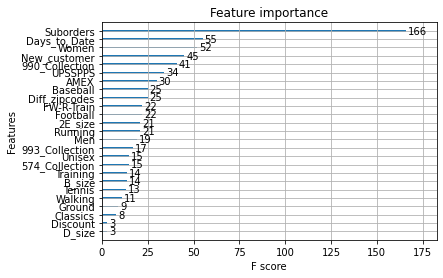

In [ ]:
# 1. Feature Importance Plot
xgb.plot_importance(XGB)

# 2. no.2 tree
digraph = xgb.to_graphviz(XGB, num_trees=2)
digraph.format = 'png'
digraph.view('/content/drive/MyDrive/Colab Notebooks/Main Colab Files/CEL/nb_xgb')


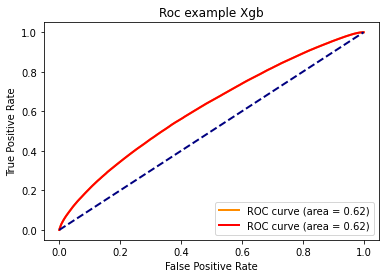

In [ ]:
def draw_roc_curve(train_pre_proba, test_pre_proba, train_auc, test_auc, model_name):
    fpr, tpr, roc_auc = train_pre_proba
    test_fpr, test_tpr, test_roc_auc = test_pre_proba

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc example ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

for name, model in zip(names, models):
    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    train_roc = roc_curve(y_train, y_train_pred)
    test_roc = roc_curve(y_test, y_test_pred)

    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    draw_roc_curve(train_roc, test_roc, train_auc, test_auc, name)

In [ ]:
ratio = float(np.sum(y == 0)) / np.sum(y == 1)
ratio

5.904198684069882

In [ ]:
# Set parameters 1: scale_pos_weight = ratio

model1 = xgb.XGBClassifier(scale_pos_weight=ratio)


# model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric=["logloss","auc"],
#         eval_set=[(X_train, y_train), (X_test, y_test)])

model1.fit(X_train, y_train)


XGBClassifier(scale_pos_weight=5.904198684069882)

In [ ]:
# apply the model to the training dataset
y_train_pred1 = model1.predict(X_train)
# apply the model to the validation dataset
y_test_pred1 = model1.predict(X_test) 
train_accuracy1 = accuracy_score(y_train,y_train_pred1)
test_accuracy1 = accuracy_score(y_test,y_test_pred1)
y_train_prob1 = model1.predict_proba(X_train)[:, 1]
y_test_prob1 = model1.predict_proba(X_test)[:, 1]
train_auc1 = roc_auc_score(y_train, y_train_prob1)
test_auc1 = roc_auc_score(y_test, y_test_prob1)

print('Training Accuracy:', train_accuracy1)
print('\nTest Accuracy:', test_accuracy1)
print('\nTraining Auc:', train_auc1)
print('\nTest Auc:', test_auc1)

Training Accuracy: 0.608673388361411

Test Accuracy: 0.6088738116262801

Training Auc: 0.617238260939675

Test Auc: 0.6174805045490175


In [ ]:
# Set parameters 1: scale_pos_weight = ratio

param_t1 = {'max_depth': range(3,10,2),
            'min_child_weight': range(1,6,2)
}

model1 = xgb.XGBClassifier(scale_pos_weight=ratio,
            learning_rate=0.01,
            n_estimators=100,
            silent=1,       
            gamma=0,
            max_delta_step=0,
            subsample=0.85,
            colsample_bytree=0.7,
            colsample_bylevel=1,
            reg_alpha=0,
            reg_lambda=1,
            seed=0,
            early_stopping_rounds=10, 
            missing=None)


# fit_params={"early_stopping_rounds":20, 
#             "eval_metric" : "auc", 
#             "eval_set" : [[X_test, y_test]]}

gsearch1 = GridSearchCV(model1, param_t1, scoring='roc_auc', verbose=1,    
         cv=TimeSeriesSplit(n_splits=3).get_n_splits([X_train, y_train]))

gsearch1.fit(X_train, y_train)
best_max_depth, best_min_child_weight = gsearch1.best_params_['max_depth'], gsearch1.best_params_['min_child_weight']


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.7,
                                     early_stopping_rounds=10,
                                     learning_rate=0.01,
                                     scale_pos_weight=5.904198684069882, seed=0,
                                     silent=1, subsample=0.85),
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='roc_auc', verbose=1)

In [ ]:
print("\nBest score: %0.3f" % gsearch1.best_score_)
print("\nBest parameters set: %s" % gsearch1.best_params_ )


Best score: 0.619

Best parameters set: {'max_depth': 9, 'min_child_weight': 1}


In [ ]:
### ---------------------------------------------------------------------------------------- ###
# Set parameters 1: early stopping
ratio = float(np.sum(y == 0)) / np.sum(y == 1)

model1 = xgb.XGBClassifier(
                max_depth = 3,
                n_estimators=200,
                gamma=0.1,
                eta=0.1, 
                nthread=4,
                subsample=0.7,
                colsample_bytree=0.75,
                min_child_weight = 1,
                scale_pos_weight = ratio,
                reg_alpha=0.03,
                seed=100)

model1.fit(X_train, y_train, early_stopping_rounds=20, eval_metric=["logloss","auc"],
        eval_set=[(X_train, y_train), (X_test, y_test)])
        
print('\nOverall AUC:', roc_auc_score(y, model1.predict_proba(X, ntree_limit=model1.best_iteration)[:,1]))


[0]	validation_0-logloss:0.627687	validation_0-auc:0.520912	validation_1-logloss:0.62939	validation_1-auc:0.520884
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-logloss:0.581828	validation_0-auc:0.52282	validation_1-logloss:0.582145	validation_1-auc:0.523198
[2]	validation_0-logloss:0.543647	validation_0-auc:0.53129	validation_1-logloss:0.542989	validation_1-auc:0.5316
[3]	validation_0-logloss:0.507825	validation_0-auc:0.531087	validation_1-logloss:0.509167	validation_1-auc:0.531395
[4]	validation_0-logloss:0.48886	validation_0-auc:0.531754	validation_1-logloss:0.487316	validation_1-auc:0.531884
[5]	validation_0-logloss:0.468647	validation_0-auc:0.531775	validation_1-logloss:0.464332	validation_1-auc:0.531932
[6]	validation_0-logloss:0.449527	validation_0-auc:0.531421	validation_1-logloss:0.449988	validation_1-auc:0.531711
[7]	validation_0-logloss:0.440061	val

XGBClassifier(colsample_bytree=0.75, eta=0.1, gamma=0.1, max_depth=4,
              min_child_weight=3, n_estimators=200, nthread=4, reg_alpha=0.03,
              scale_pos_weight=0.16849583892492828, seed=100, subsample=0.7)


Overall AUC: 0.5411956340670615


Text(0.5, 0, 'Number of trees')

Text(0, 0.5, 'AUC')

Text(0.5, 1.0, 'XGBoost AUC')

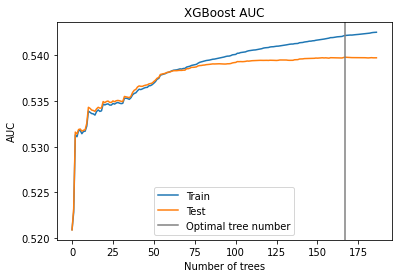

Text(0.5, 0, 'Number of trees')

Text(0, 0.5, 'Classification Logloss')

Text(0.5, 1.0, 'XGBoost Classification Logloss')

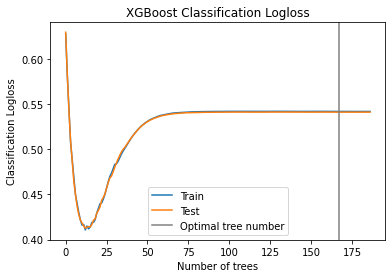

In [ ]:
results = model1.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
plt.axvline(167, color="gray", label="Optimal tree number")
ax.legend()
pyplot.xlabel("Number of trees")
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.axvline(167, color="gray", label="Optimal tree number")
ax.legend()
pyplot.xlabel("Number of trees")
pyplot.ylabel('Classification Logloss')
pyplot.title('XGBoost Classification Logloss')
pyplot.show()

In [ ]:
# Set parameters 2: scale_pos_weight = 6.5
model2 = xgb.XGBClassifier(
                max_depth = 3,
                n_estimators=200,
                gamma=0.1,
                eta=0.1, 
                nthread=4,
                subsample=0.7,
                colsample_bytree=0.75,
                min_child_weight = 1,
                scale_pos_weight = 6.5,
                reg_alpha=0.03,
                seed=100)

model2.fit(X_train, y_train)


XGBClassifier(colsample_bytree=0.75, eta=0.1, gamma=0.1, n_estimators=200,
              nthread=4, reg_alpha=0.03, scale_pos_weight=6.5, seed=100,
              subsample=0.7)

In [ ]:
# apply the model to the training dataset
y_train_pred = model.predict(X_train)
# apply the model to the validation dataset
y_test_pred = model.predict(X_test) 


In [ ]:
# accuracy
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
# calculate the area under the curve of predicted probabilities rather than the predicted value 0 or 1
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]
# auc
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
# roc curve
train_roc = roc_curve(y_train, y_train_prob)
test_roc = roc_curve(y_test, y_test_prob)

In [ ]:
pd.DataFrame(np.array(
        [train_accuracy, train_auc, test_accuracy, test_auc]).reshape(2, -1),
        index=['train', 'test'],
        columns=['Accuracy', 'AUC-Score'])

,Accuracy,AUC-Score
train,0.358352,0.545404
test,0.355547,0.543235


In [ ]:
# Set parameters 3: scale_pos_weight = 6~6.5 with step = 0.1
param_t = {'scale_pos_weight': [x / 10.0 for x in range(60, 65, 1)]}

xlf = xgb.XGBClassifier(
            learning_rate=0.1,
            max_depth=3,
            min_child_weight=1,
            silent=1,       
            gamma=0,
            max_delta_step=0,
            subsample=0.85,
            colsample_bytree=0.7,
            colsample_bylevel=1,
            reg_alpha=0,
            reg_lambda=1,
            seed=0,
            missing=None)

optimal_params = GridSearchCV(xlf, param_grid=param_t, scoring='accuracy', cv=3)
optimal_params.fit(X_train, y_train)
best_n_estimators = optimal_params.best_params_['scale_pos_weight']

print("Best score: %0.3f" % optimal_params.best_score_)
print("\nBest parameters set: %s" % optimal_params.best_params_ )

GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.7, seed=0, silent=1,
                                     subsample=0.85),
             param_grid={'scale_pos_weight': [6.0, 6.1, 6.2, 6.3, 6.4]},
             scoring='accuracy')

Best score: 0.538

Best parameters set: {'scale_pos_weight': 6.0}


In [ ]:
y_pred1 = model1.predict(X_test, ntree_limit=167)
accuracy1 = accuracy_score(y_test,y_pred1)
print("accuarcy: %.2f%%" % (accuracy1*100.0))

accuarcy: 85.59%


In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
#model1.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, early_stopping_rounds=10, verbose=True)
plst1 = params1.items()

 # xgboost模型训练
y_pred1 = model1.predict(dtest)
accuracy1 = accuracy_score(y_test,y_pred1)
print("accuarcy: %.2f%%" % (accuracy1*100.0))

accuarcy: 85.58%


In [ ]:
def modelfit(alg, X_train, y_train, useTrainCV=True, cv_folds=3, early_stopping_rounds=10):

    if useTrainCV:

        xgb_param = alg.get_xgb_params()

        dtrain = xgb.DMatrix(X_train, y_train) 

        cvresult = xgb.cv(xgb_param, dtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,

        metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=4)

        alg.set_params(n_estimators=cvresult.shape[0])

        #Fit the algorithm on the data

        alg.fit(X_train, y_train, eval_metric='auc')

        #Predict training set:

        dtrain_predictions = alg.predict(X_train)

        dtrain_predprob = alg.predict_proba(X_train)[:,1]

        #Print model report:

        print("\nModel Report")

        print("Accuracy : %.4g" % metrics.accuracy_score(y_train.values, dtrain_predictions))

        print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))


In [ ]:
ratio = float(np.sum(y == 0)) / np.sum(y==1)
ratio

5.934864661230836

In [ ]:
xgb1 = XGBClassifier(

          learning_rate =0.1,

          n_estimators=200,

          max_depth=5,

          min_child_weight=1,

          gamma=0,

          subsample=0.8,

          colsample_bytree=0.8,

          objective= 'binary:logistic',

          nthread=4,

          scale_pos_weight=ratio,

          seed=27)

model1 = modelfit(xgb1, X_train, y_train)

[0]	train-auc:0.529128+0.000465595	test-auc:0.528378+0.00142533
[4]	train-auc:0.534418+0.000789132	test-auc:0.53322+0.0012046
[8]	train-auc:0.53641+0.000785889	test-auc:0.535206+0.00108308
[12]	train-auc:0.53723+0.000614442	test-auc:0.535936+0.00104948
[16]	train-auc:0.537845+0.000515009	test-auc:0.536343+0.00106829
[20]	train-auc:0.538514+0.000652467	test-auc:0.536767+0.000906772
[24]	train-auc:0.539073+0.000571759	test-auc:0.537147+0.000852113
[28]	train-auc:0.539661+0.000616702	test-auc:0.537547+0.000882386
[32]	train-auc:0.540176+0.000402204	test-auc:0.537816+0.00098422
[36]	train-auc:0.5407+0.000405299	test-auc:0.538075+0.000930781
[40]	train-auc:0.54098+0.000438836	test-auc:0.538105+0.000877766
[44]	train-auc:0.541419+0.000491916	test-auc:0.538282+0.000835944
[48]	train-auc:0.541728+0.000546788	test-auc:0.538384+0.000802315
[52]	train-auc:0.542084+0.000420802	test-auc:0.5385+0.000887322
[56]	train-auc:0.542432+0.000411232	test-auc:0.538595+0.000878867
[60]	train-auc:0.54279+0.000

In [ ]:
xgb2 = XGBClassifier(

          learning_rate =0.1,

          n_estimators=200,

          max_depth=5,

          min_child_weight=1,

          gamma=0,

          subsample=0.8,

          colsample_bytree=0.8,

          objective= 'binary:logistic',

          nthread=4,

          scale_pos_weight=1,

          seed=27)

model2 = modelfit(xgb2, X_train, y_train)

[0]	train-auc:0.529104+0.000476488	test-auc:0.528399+0.00144351
[4]	train-auc:0.534257+0.000439183	test-auc:0.533142+0.00141547
[8]	train-auc:0.535691+0.000509703	test-auc:0.534605+0.00117421
[12]	train-auc:0.536279+0.000474318	test-auc:0.53505+0.00127019
[16]	train-auc:0.536911+0.000408155	test-auc:0.535585+0.00114643
[20]	train-auc:0.537367+0.000580366	test-auc:0.535894+0.000970406
[24]	train-auc:0.537921+0.000503419	test-auc:0.536204+0.00105591
[28]	train-auc:0.538623+0.0006565	test-auc:0.536816+0.000921349
[32]	train-auc:0.539114+0.000608682	test-auc:0.537111+0.000944569
[36]	train-auc:0.539612+0.000509502	test-auc:0.537384+0.00099474
[40]	train-auc:0.539979+0.000512192	test-auc:0.537553+0.000924051
[44]	train-auc:0.540497+0.000441186	test-auc:0.537806+0.00101833
[48]	train-auc:0.540874+0.000505406	test-auc:0.537997+0.000876483
[52]	train-auc:0.541299+0.000479863	test-auc:0.538221+0.000875723
[56]	train-auc:0.541703+0.000448694	test-auc:0.538388+0.000904408
[60]	train-auc:0.542077+

In [ ]:
# Set parameters
ratio = float(np.sum(y == 0)) / np.sum(y == 1)

model1 = xgb.XGBClassifier(
                max_depth = 3,
                n_estimators=200,
                gamma=0.1,
                eta=0.1, 
                nthread=4,
                subsample=0.7,
                colsample_bytree=0.75,
                min_child_weight = 1,
                scale_pos_weight = ratio,
                reg_alpha=0.03,
                seed=100)

model1.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["auc"],
        eval_set=[(X_train, y_train), (X_test, y_test)])
        
print('\nOverall AUC:', roc_auc_score(y, model1.predict_proba(X, ntree_limit=model1.best_iteration)[:,1]))

[0]	validation_0-auc:0.520875	validation_1-auc:0.520779
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.521701	validation_1-auc:0.521659
[2]	validation_0-auc:0.524516	validation_1-auc:0.524673
[3]	validation_0-auc:0.525808	validation_1-auc:0.525938
[4]	validation_0-auc:0.530034	validation_1-auc:0.530402
[5]	validation_0-auc:0.53275	validation_1-auc:0.533298
[6]	validation_0-auc:0.532284	validation_1-auc:0.532919
[7]	validation_0-auc:0.532123	validation_1-auc:0.532606
[8]	validation_0-auc:0.531903	validation_1-auc:0.532443
[9]	validation_0-auc:0.531788	validation_1-auc:0.532313
[10]	validation_0-auc:0.532433	validation_1-auc:0.533007
[11]	validation_0-auc:0.533238	validation_1-auc:0.533767
[12]	validation_0-auc:0.533676	validation_1-auc:0.534313
[13]	validation_0-auc:0.533924	validation_1-auc:0.534595
[14]	validation_0-auc:0.534325	validation_1-auc:0.535052

XGBClassifier(colsample_bytree=0.75, eta=0.1, gamma=0.1, min_child_weight=3,
              n_estimators=200, nthread=4, reg_alpha=0.03,
              scale_pos_weight=5.934864661230836, seed=100, subsample=0.7)


Overall AUC: 0.540212578479763


In [ ]:
param_t2 = {'n_estimators': range(100,500,100)
}

xlf = xgb.XGBClassifier(
            learning_rate=0.1,
            max_depth=best_max_depth,
            min_child_weight=best_min_child_weight,
            silent=1,
            objective='multi:softmax',
            num_class=2,          
            gamma=0,
            max_delta_step=0,
            subsample=0.85,
            colsample_bytree=0.7,
            colsample_bylevel=1,
            reg_alpha=0,
            reg_lambda=1,
            scale_pos_weight=1,
            seed=0,
            missing=None)

optimal_params_2 = GridSearchCV(xlf, param_grid=param_t2, scoring='accuracy', cv=3)
optimal_params_2.fit(X_train, y_train)
best_n_estimators = optimal_params_2.best_params_['n_estimators']

print("Best score: %0.3f" % optimal_params_1.best_score_)
print("Best parameters set: %s" % optimal_params_1.best_params_ )

GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.7, num_class=2,
                                     objective='multi:softmax', seed=0,
                                     silent=1, subsample=0.85),
             param_grid={'n_estimators': range(100, 500, 100)},
             scoring='accuracy')

Best score: 0.500
Best parameters set: {'max_depth': 3, 'min_child_weight': 1}


In [ ]:
print("Best parameters set: %s" % optimal_params_2.best_params_ )

Best parameters set: {'n_estimators': 100}


In [ ]:
print("Best score: %0.3f" % optimal_params.best_score_)
print("Best parameters set: %s" % optimal_params.best_params_ )

Best score: 0.856
Best parameters set: {'max_depth': 4, 'n_estimators': 5}


In [ ]:
# parameters
from sklearn.model_selection import GridSearchCV

parameters = {
              'max_depth': [5, 10, 15, 20, 25],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'n_estimators': [500, 1000, 2000, 3000, 5000],
              'min_child_weight': [0, 2, 5, 10, 20],
              'max_delta_step': [0, 0.2, 0.6, 1, 2],
              'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
              'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
              'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
              'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]

}

xlf = xgb.XGBClassifier(max_depth=10,
            learning_rate=0.01,
            n_estimators=2000,
            silent=True,
            objective='multi:softmax',
            num_class=2,          
            nthread=-1,
            gamma=0,
            min_child_weight=1,
            max_delta_step=0,
            subsample=0.85,
            colsample_bytree=0.7,
            colsample_bylevel=1,
            reg_alpha=0,
            reg_lambda=1,
            scale_pos_weight=1,
            seed=0,
            missing=None)

optimal_params = GridSearchCV(xlf, param_grid=parameters, scoring='accuracy', cv=3)
optimal_params.fit(X_train, y_train)

print("Best score: %0.3f" % optimal_params.best_score_)
print("Best parameters set: %s" % optimal_params.best_params_ )

KeyboardInterrupt: ignored